<a href="https://colab.research.google.com/github/suvasish114/ML-Models/blob/main/Copy_of_K_Means_Clustering_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

In [ ]:
# Library requirements
%pip install numpy matplotlib pandas ipython

In [120]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import IPython.display as dsp
import random, math, time

In [121]:
# Reading data from .csv file
data = pd.read_csv("Shopping_CustomerData.csv")
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   CustomerGender  200 non-null    object 
 2   CustomerAge     200 non-null    int64  
 3   CustomerCity    200 non-null    object 
 4   AnnualIncome    200 non-null    float64
 5   CreditScore     200 non-null    int64  
 6   SpendingScore   200 non-null    int64  
 7   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [122]:
# Check if any null values present in the dataset
print(data.isna().any())

CustomerID        False
CustomerGender    False
CustomerAge       False
CustomerCity      False
AnnualIncome      False
CreditScore       False
SpendingScore     False
CustomerCityID    False
dtype: bool


In [123]:
# Filtering only required column from the dataset as trining data
training_data = data[["AnnualIncome", "CreditScore"]]
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AnnualIncome  200 non-null    float64
 1   CreditScore   200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB
None


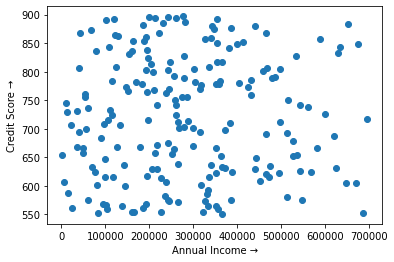

In [124]:
# Plot data distribution in a 2D plane
fig, ax = plt.subplots()
x = training_data["AnnualIncome"]
y = training_data["CreditScore"]
ax.scatter(x, y)
plt.xlabel("Annual Income →")
plt.ylabel("Credit Score →")
plt.show()

In [162]:
# Selecting two hypothetical centroid
midx = int(training_data["AnnualIncome"].median())
midy = int(training_data["CreditScore"].median())

# choosing centroid with high risk
centroid1 = [ random.randint(int(min(training_data["AnnualIncome"])), midx),
             random.randint(int(min(training_data["CreditScore"])), midy) ]

# choosing centroid with low risk
centroid2 = [ random.randint(midx + 1, int(max(training_data["AnnualIncome"]))),
             random.randint(midy + 1, int(max(training_data["CreditScore"]))) ]

# printing centroids
print(centroid1, centroid2)

[159510, 632] [275890, 794]


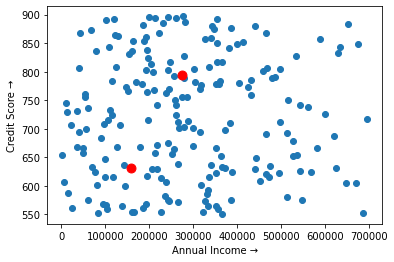

In [163]:
# Plotting
fig, ax = plt.subplots()
x = training_data["AnnualIncome"]
y = training_data["CreditScore"]
ax.scatter(x, y)
ax.scatter([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], s=[80], color='red')
plt.xlabel("Annual Income →")
plt.ylabel("Credit Score →")
plt.show()

In [127]:
# Storing datapoints in a hashmap
# Format: {(x co-ordinate, y co-ordinate): cluster_label}
label = [None for _ in range(len(training_data))]
cluster_map = dict(zip(
    zip(training_data["AnnualIncome"].to_list(),
        training_data["CreditScore"].to_list()), label))

In [128]:
# Function: Calculate centorid point
def calculate_centroid(points):
  ''' Calculate centroid point of the dataset by calculating the mean value of
  the x and y dimention '''
  xax = []
  yax = []
  for point in points:
    xax.append(point[0])
    yax.append(point[1])
  return [np.array(xax).mean(), np.array(yax).mean()]

In [129]:
# Function: Calculate euclidean distance
def euclidean_distance(point1, point2):
  ''' Calculating euclidean distance between two points on a 2D plane '''
  return math.sqrt((point2[1]-point1[1])**2 + (point2[0]-point1[0])**2)

In [130]:
# Function: K-Mean clustering
def kmeans_clustering(cluster_map, centroid1, centroid2):
  flag = False
  cluster1, cluster2 = [],[]

  # labeling the coordinates
  for a in list(cluster_map.keys()):
    if euclidean_distance(a, centroid1) < euclidean_distance(a, centroid2):
      if cluster_map[a] != 1:
        flag = True
      cluster_map[a] = 1
      cluster1.append(a)
    else:
      if cluster_map[a] != 2:
        flag = True
      cluster_map[a] = 2
      cluster2.append(a)
  
  # move the centroid
  centroid1 = calculate_centroid(cluster1)
  centroid2 = calculate_centroid(cluster2)
  return flag, centroid1, centroid2

In [131]:
# Function: Get clusters as list of list
def get_clusters():
  x1, y1, x2, y2 = [],[],[],[]
  for a in cluster_map.keys():
    if cluster_map[a] == 1:
      x1.append(a[0])
      y1.append(a[1])
    else:
      x2.append(a[0])
      y2.append(a[1])
  return [x1,y1],[x2,y2]

Text(0, 0.5, 'Credit Score →')

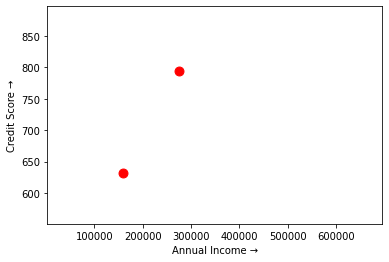

In [164]:
fig, ax = plt.subplots()
frm1 = ax.scatter([], [], color='#5DADE2')
frm2 = ax.scatter([], [], color='#58D68D')
frm3 = ax.scatter([centroid1[0], centroid2[0]],  [centroid1[1], centroid2[1]], s=[80], color='red')
ax.set(xlim=[min(training_data["AnnualIncome"]), max(training_data["AnnualIncome"])],
       ylim=[min(training_data["CreditScore"]), max(training_data["CreditScore"])])
plt.xlabel("Annual Income →")
plt.ylabel("Credit Score →")
# plt.show()

In [146]:
# Function: animation
c1,c2 = [[],[]], [[],[]]
def animate(i):
  ''' animate the canvas at each interval '''
  global centroid1, centroid2, c1, c2
  frm1.set_offsets(np.stack([c1[0],c1[1]]).T)
  frm2.set_offsets(np.stack([c2[0],c2[1]]).T)
  frm3.set_offsets(np.stack([[centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]]]).T)
  
  # update values
  c1,c2 = get_clusters()
  _, centroid1, centroid2 = kmeans_clustering(cluster_map, centroid1, centroid2)
  
  return (frm1, frm2, frm3)

In [165]:
ani = FuncAnimation(fig, animate, frames=10, interval=300)
video = ani.to_html5_video()
html = dsp.HTML(video)
dsp.display(html)
plt.close()